<h1>UV Index analyis -TASMANIA

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [39]:
import calendar
import datetime

<h2>Import Tasmania(Kingston) UV index dataset from Australian government website

In [40]:
df = pd.read_csv('https://data.gov.au/data/dataset/a182fb57-4355-404d-b462-dfd7c92feba9/resource/e6ec922b-9df8-47aa-8795-dd5373830b76/download/uv-kingston-2018.csv')

In [41]:
df.head()


,Date-Time,Lat,Lon,UV_Index
0,2018-01-01 00:00:00,-42.99,147.29,0.01
1,2018-01-01 00:01:00,-42.99,147.29,0.01
2,2018-01-01 00:02:00,-42.99,147.29,0.01
3,2018-01-01 00:03:00,-42.99,147.29,0.01
4,2018-01-01 00:04:00,-42.99,147.29,0.01


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523442 entries, 0 to 523441
Data columns (total 4 columns):
Date-Time    523442 non-null object
Lat          523442 non-null float64
Lon          523442 non-null float64
UV_Index     523442 non-null float64
dtypes: float64(3), object(1)
memory usage: 16.0+ MB


In [43]:
df['Date-Time'] = df['Date-Time'].astype('datetime64')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523442 entries, 0 to 523441
Data columns (total 4 columns):
Date-Time    523442 non-null datetime64[ns]
Lat          523442 non-null float64
Lon          523442 non-null float64
UV_Index     523442 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 16.0 MB


In [45]:
df.describe()

,Lat,Lon,UV_Index
count,5.234420e+05,5.234420e+05,523442.000000
mean,-4.299000e+01,1.472900e+02,0.927751
std,2.720458e-10,1.722641e-10,1.868436
min,-4.299000e+01,1.472900e+02,0.010000
25%,-4.299000e+01,1.472900e+02,0.010000
50%,-4.299000e+01,1.472900e+02,0.010000
75%,-4.299000e+01,1.472900e+02,0.880000
max,-4.299000e+01,1.472900e+02,12.650000


In [46]:
def UV_Index_new(index):
    if index<=float(2):
        return 'Minimal'
    if index<=float(4):
        return 'Low'
    if index<=float(6):
        return 'Moderate'
    else:
        return 'High'

In [47]:
df['UV_Index_new']=df['UV_Index'].apply(lambda x:UV_Index_new(x))
df.groupby('UV_Index_new').size()

UV_Index_new
High         20080
Low          40479
Minimal     442783
Moderate     20100
dtype: int64

<h2>Most UV measurements fall within minimal level category 

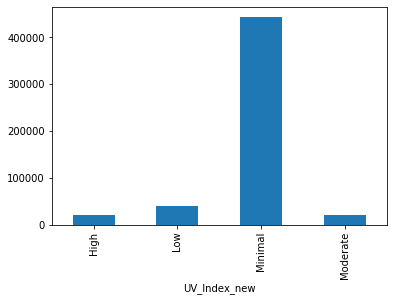

In [48]:
df.groupby('UV_Index_new').size().plot(kind='bar')

<h2>Clear distinction between summer and winter Uv levels

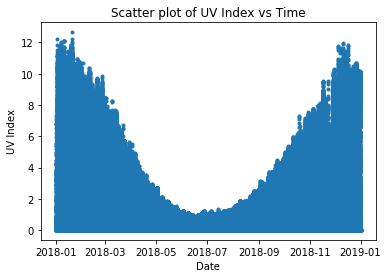

In [49]:
plt.plot(df['Date-Time'],df['UV_Index'],'.')
plt.xlabel('Date')
plt.ylabel('UV Index')
plt.title('Scatter plot of UV Index vs Time')
plt.show()

<h2>UV index distribution is right skewed 

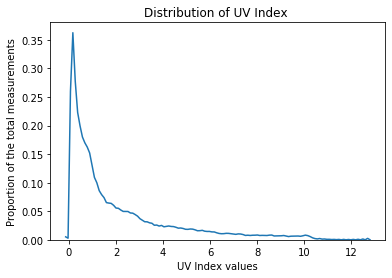

In [50]:
sns.distplot(df['UV_Index'],hist=False)
plt.title('Distribution of UV Index ')
plt.xlabel('UV Index values')
plt.ylabel('Proportion of the total measurements')
plt.show()

In [51]:
df.groupby(df['Date-Time'].dt.strftime('%B')).mean()

,Lat,Lon,UV_Index
Date-Time,,,
April,-42.99,147.29,0.563583
August,-42.99,147.29,0.289796
December,-42.99,147.29,2.070730
February,-42.99,147.29,1.591046
January,-42.99,147.29,2.080298
July,-42.99,147.29,0.177394
June,-42.99,147.29,0.161210
March,-42.99,147.29,1.120634
May,-42.99,147.29,0.231696


In [52]:
df_monthly_means = df.groupby(df['Date-Time'].dt.strftime('%B')).mean()

In [53]:
df_monthly_means = df_monthly_means.reset_index()
df_monthly_means

,Date-Time,Lat,Lon,UV_Index
0,April,-42.99,147.29,0.563583
1,August,-42.99,147.29,0.289796
2,December,-42.99,147.29,2.070730
3,February,-42.99,147.29,1.591046
4,January,-42.99,147.29,2.080298
5,July,-42.99,147.29,0.177394
6,June,-42.99,147.29,0.161210
7,March,-42.99,147.29,1.120634
8,May,-42.99,147.29,0.231696
9,November,-42.99,147.29,1.235667


<h2>High UV levels during summer and lower UV levels during winter

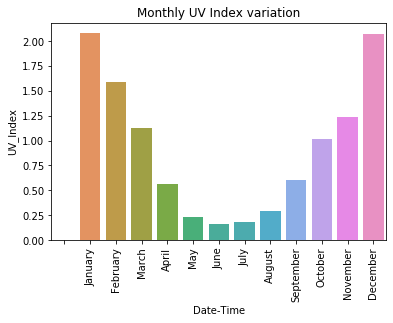

In [54]:
months=[]
for i in calendar.month_name:
    months.append(i)
    
sns.barplot(df_monthly_means['Date-Time'],df_monthly_means['UV_Index'],order=months)
plt.xticks(rotation=90)
plt.title('Monthly UV Index variation')
plt.show()

In [55]:
df_Jan = df.groupby(df['Date-Time'].dt.strftime('%B')).get_group('January')

<h2>Most of the UV data falls within the Minimal category according to below graph

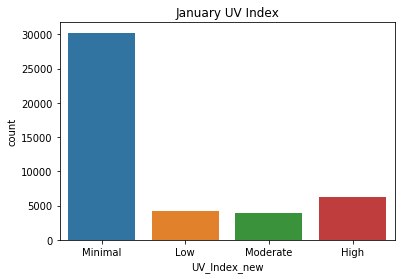

In [56]:
sns.countplot(df_Jan['UV_Index_new'])
plt.title('January UV Index')
plt.show()

<h2>Box plot shows more variation in UV levels at High UV index group

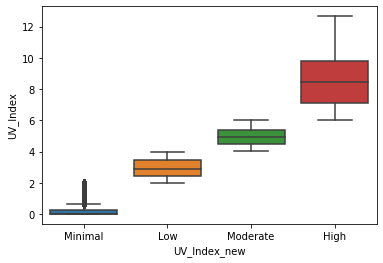

In [134]:
sns.boxplot(df_Jan['UV_Index_new'],df_Jan['UV_Index'])

In [133]:
df_Jan_Hr = df_Jan.groupby(df_Jan['Date-Time'].dt.strftime('%H')).mean()
df_Jan_Hr = df_Jan_Hr.reset_index()

<h3>Hourly UV index behaviour as a continuous plot for January

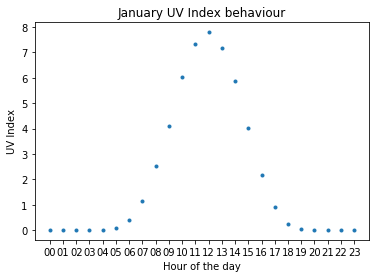

In [61]:
plt.plot(df_Jan_Hr['Date-Time'],df_Jan_Hr['UV_Index'],'.')
plt.title('January UV Index behaviour')
plt.xlabel('Hour of the day')
plt.ylabel('UV Index')
plt.show()

In [62]:
df_Jan_Hr['UV_Index_new']=df_Jan_Hr['UV_Index'].apply(lambda x:UV_Index_new(x))
df_Jan_Hr.groupby('UV_Index_new').size()

UV_Index_new
High         4
Low          2
Minimal     15
Moderate     3
dtype: int64

<h3>Jan hourly UV distribution as descrete plot

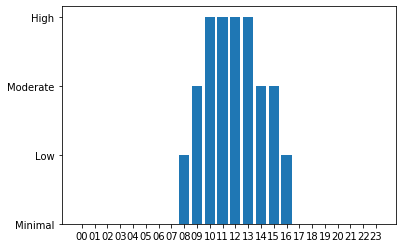

In [63]:
plt.bar(df_Jan_Hr['Date-Time'],df_Jan_Hr['UV_Index_new'])
plt.show()

<h3>Assign colors for UV levels 

In [64]:
def my_func(x):
    colors=[]
    for i in x:
        if i<=float(2):
            colors.append('green')
            continue 
            
        if i<=float(4):
            colors.append('blue')
            continue
            
        if i<=float(6):
            colors.append('orange')
            continue
                         
        else:
            colors.append('red')
            
    return colors

<H3>Daily UV index distribution in January 

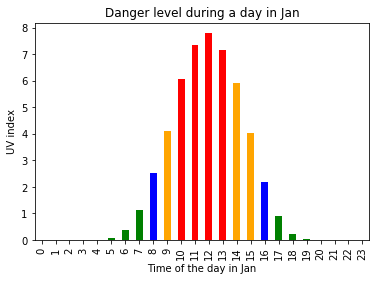

In [66]:
df_Jan_Hr['UV_Index'].plot(kind='bar',color= my_func(df_Jan_Hr['UV_Index']))
plt.xlabel('Time of the day in Jan')
plt.ylabel('UV index')
plt.title('Danger level during a day in Jan')
plt.show()

<h2>Define a function to display hourly UV index distribution of Tasmania for any month 

In [67]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [128]:
def monthly_UV_distribution_tas(month):
    df_by_month = df.groupby(df['Date-Time'].dt.strftime('%B')).get_group(month)
    df_by_Hr = df_by_month.groupby(df_by_month['Date-Time'].dt.strftime('%H')).mean()
    df_by_Hr = df_by_Hr.reset_index()
    
    def my_func(x):
        colors=[]
        for i in x:
            if i<=float(2):
                colors.append('green')
                continue 

            if i<=float(4):
                colors.append('blue')
                continue

            if i<=float(6):
                colors.append('orange')
                continue

            else:
                colors.append('red')

        return colors
    
    df_by_Hr['UV_Index'].plot(kind='bar',color= my_func(df_by_Hr['UV_Index']))
    plt.xlabel('Time of the day in %s' %month)
    plt.ylabel('UV index')
    plt.title('Tasmania Danger level during a day in %s' %month)
    plt.show()


<h2>Compare UV index between any two months of the year with two interactive graphs
<h3>Dec,Jan and Feb have high UV levels compared to other months 

In [129]:
from IPython.display import display
from IPython.html import widgets 
from ipywidgets import interact, interactive, fixed, interact_manual

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
interact(monthly_UV_distribution_tas,month= months)
interact(monthly_UV_distribution_tas,month= months)

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

<function __main__.monthly_UV_distribution_tas(month)>

<h2>Load Sydney UV index data set 

In [140]:
df_sydney = pd.read_csv('https://data.gov.au/data/dataset/c31a759c-a4d4-455f-87a7-98576be14f11/resource/40376ebe-9efc-4b72-98e7-20964d68a530/download/uv-sydney-2018.csv')

In [142]:
df_sydney['Date-Time']=df_sydney['Date-Time'].astype('datetime64')

<h2>Define hourley UV distribution function for Sydney data set for any given month

In [130]:
def monthly_UV_distribution_sydney(month):
    df_by_month = df_sydney.groupby(df['Date-Time'].dt.strftime('%B')).get_group(month)
    df_by_Hr = df_by_month.groupby(df_by_month['Date-Time'].dt.strftime('%H')).mean()
    df_by_Hr = df_by_Hr.reset_index()
    
    def my_func(x):
        colors=[]
        for i in x:
            if i<=float(2):
                colors.append('green')
                continue 

            if i<=float(4):
                colors.append('blue')
                continue

            if i<=float(6):
                colors.append('orange')
                continue

            else:
                colors.append('red')

        return colors
    
    df_by_Hr['UV_Index'].plot(kind='bar',color= my_func(df_by_Hr['UV_Index']))
    plt.xlabel('Time of the day in %s' %month)
    plt.ylabel('UV index')
    plt.title('Sydney danger level during a day in %s' %month)
    plt.show()

<h2>Comparison of UV Indeces between Tasmania(Kingston) and Sydney via an interactive graph
<h3>Tasmania looks safer than Sydney!

In [131]:
from IPython.display import display
from IPython.html import widgets 
from ipywidgets import interact, interactive, fixed, interact_manual

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
interact(monthly_UV_distribution_sydney,month= months)
interact(monthly_UV_distribution_tas,month= months)

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

<function __main__.monthly_UV_distribution_tas(month)>

<h2>Let's add one more city to the comparison, Melborne

In [137]:
df_mel = pd.read_csv('https://data.gov.au/data/dataset/fb836013-f300-4f92-aa1e-fb5014aea40e/resource/0eb24d04-95c0-4ec9-b72e-e7491bf9b766/download/uv-melbourne-2018.csv')

In [138]:
df_mel['Date-Time']=df_mel['Date-Time'].astype('datetime64')

In [143]:
def monthly_UV_distribution_mel(month):
    df_by_month = df_mel.groupby(df['Date-Time'].dt.strftime('%B')).get_group(month)
    df_by_Hr = df_by_month.groupby(df_by_month['Date-Time'].dt.strftime('%H')).mean()
    df_by_Hr = df_by_Hr.reset_index()
    
    def my_func(x):
        colors=[]
        for i in x:
            if i<=float(2):
                colors.append('green')
                continue 

            if i<=float(4):
                colors.append('blue')
                continue

            if i<=float(6):
                colors.append('orange')
                continue

            else:
                colors.append('red')

        return colors
    
    df_by_Hr['UV_Index'].plot(kind='bar',color= my_func(df_by_Hr['UV_Index']))
    plt.xlabel('Time of the day in %s' %month)
    plt.ylabel('UV index')
    plt.title('Melborne danger level during a day in %s' %month)
    plt.show()

<h2>Kingston Tasmania shows slightly lower levels of UV radiation than Melborne
<h3>Change the month in the below interactive graphs and make your own comparison 

In [144]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
interact(monthly_UV_distribution_sydney,month= months)
interact(monthly_UV_distribution_tas,month= months)
interact(monthly_UV_distribution_mel,month= months)

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

interactive(children=(Dropdown(description='month', options=('January', 'February', 'March', 'April', 'May', '…

<function __main__.monthly_UV_distribution_mel(month)>

<h3>Created by Savinda Lakshan Kalubowila (BSc.Eng)